In [190]:
import pandas as pd
import bokeh
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from ipywidgets import interact, interact_manual

import matplotlib.pyplot as plt
import geopandas

In [191]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [192]:
import os 

In [255]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [193]:
path = '/Users/Sarah/Desktop/Policy_Lab/map/'

cities_path = 'simplemaps_uscities_basicv1/uscities.csv'
us_path = 'tl_2017_us_state/tl_2017_us_state.shp'

In [194]:
def read_df(path, filename):
    df = pd.read_csv(os.path.join(path, filename))
    return df

In [195]:
cities = read_df(path, cities_path)

In [196]:
cities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [223]:
cities["city_state"] = cities['city'].map(str) + ', ' + cities['state_id']
cities.head()
#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python 

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,...,density,source,military,incorporated,timezone,ranking,zips,id,geometry,city_state
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,...,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412,POINT (-122.39210 46.99940),"South Creek, WA"
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,...,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718,POINT (-121.09890 47.25070),"Roslyn, WA"
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,...,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300,POINT (-117.97130 47.30480),"Sprague, WA"
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,...,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082,POINT (-122.59680 47.33520),"Gig Harbor, WA"
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,...,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371,POINT (-122.09200 48.06390),"Lake Cassidy, WA"


In [225]:
cities_gdf = geopandas.GeoDataFrame(cities, geometry=geopandas.points_from_xy(cities['lng'], cities['lat']))

In [228]:
cities_gdf.head()
#cities_gdf.shape

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,...,density,source,military,incorporated,timezone,ranking,zips,id,geometry,city_state
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,...,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412,POINT (-122.39210 46.99940),"South Creek, WA"
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,...,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718,POINT (-121.09890 47.25070),"Roslyn, WA"
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,...,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300,POINT (-117.97130 47.30480),"Sprague, WA"
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,...,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082,POINT (-122.59680 47.33520),"Gig Harbor, WA"
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,...,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371,POINT (-122.09200 48.06390),"Lake Cassidy, WA"


In [229]:
test = cities_gdf.loc[0]
test

city                             South Creek
city_ascii                       South Creek
state_id                                  WA
state_name                        Washington
county_fips                            53053
county_name                           Pierce
county_fips_all                        53053
county_name_all                       Pierce
lat                                  46.9994
lng                                 -122.392
population                              2500
density                                  125
source                               polygon
military                               False
incorporated                            True
timezone                 America/Los_Angeles
ranking                                    3
zips                       98580 98387 98338
id                                1840116412
geometry           POINT (-122.3921 46.9994)
city_state                   South Creek, WA
Name: 0, dtype: object

In [200]:
#map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
#us = world[world['country'] == 'US']

In [201]:
#us = geopandas.read_file(os.path.join(path, us_path))
shp = os.path.join(path, us_path)
countries = geopandas.read_file(shp)

In [202]:
countries['STUSPS'].unique()


array(['WV', 'FL', 'IL', 'MN', 'MD', 'RI', 'ID', 'NH', 'NC', 'VT', 'CT',
       'DE', 'NM', 'CA', 'NJ', 'WI', 'OR', 'NE', 'PA', 'WA', 'LA', 'GA',
       'AL', 'UT', 'OH', 'TX', 'CO', 'SC', 'OK', 'TN', 'WY', 'HI', 'ND',
       'KY', 'VI', 'MP', 'GU', 'ME', 'NY', 'NV', 'AK', 'AS', 'MI', 'AR',
       'MS', 'MO', 'MT', 'KS', 'IN', 'PR', 'SD', 'MA', 'VA', 'DC', 'IA',
       'AZ'], dtype=object)

In [270]:
states = ['WV', 'FL', 'IL', 'MN', 'MD', 'RI', 'ID', 'NH', 'NC', 'VT', 'CT',
       'DE', 'NM', 'CA', 'NJ', 'WI', 'OR', 'NE', 'PA', 'WA', 'LA', 'GA',
       'AL', 'UT', 'OH', 'TX', 'CO', 'SC', 'OK', 'TN', 'WY', 'ND',
       'KY', 'ME', 'NY', 'NV', 'MI', 'AR',
       'MS', 'MO', 'MT', 'KS', 'IN', 'SD', 'MA', 'VA', 'DC', 'IA',
       'AZ']
test = countries[countries['STUSPS'].isin(states)]
#citehttps://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values

In [226]:
city_state_dict = {'Cincinnati':'OH', 'Cleveland': 'OH', 'Houston': 'TX'}
#for key in city_state_dict:
#    print(key, city_state_dict[key])
#https://realpython.com/iterate-through-dictionary-python/#how-to-iterate-through-a-dictionary-in-python-the-basics
def check_city_state(df, city_state_dict, key):
    match = False
    for i in list(range(len(cities_gdf))):
        if df['city'][i] == key and df['state_id'][i] == city_state_dict[key]: 
            match = True
    
    return match

In [205]:
#list(range(len(cities_gdf)))

In [206]:
for key in city_state_dict:
    print(check_city_state(cities_gdf, city_state_dict, 'Cincinnati'))

True
True
True


In [276]:
re_list = ['Abita Springs, LA', 'Ambler Borough, PA', 'Amherst, MA', 'Angel Fire, NM', 
           'Apex, NC', 'Arlington, VA', 'Athens, GA', 'Atlanta, GA', 'Augusta, GA', 'Berkeley, CA',
          'Blacksburg, VA', 'Boise, ID', 'Boulder, CO', 'Breckenridge, CO', 'Cambridge, MA', 
          'Chapel Hill, NC', 'Cheltenham, PA', 'Chicago, IL', 'Chula Vista, CA', 'Cincinnati, OH',
          'Clarkston, GA', 'Cleveland, OH', 'Columbia, SC', 'Concord, NH', 'Conshohocken Borough, PA',
          'Cornish, NH', 'Cottonwood Heights, UT', 'Culver City, CA', 'Del Mar, CA', 'Denton, TX',
          'Denver, CO', 'Downingtown Borough, PA', 'Dunedin, FL', 'Durango, CO', 'Eagle Nest, NM',
          'East Bradford, PA', 'East Hampton, NY', 'East Pikeland Township, PA', 'Eau Claire, WI',
          'Edmonds, WA', 'Encinitas, CA', ' Eureka, CA', 'Evanston, IL', 'Fayetteville, AR', 'Fort Collins, CO',
          'Frisco, CO', 'Gainesville, FL', 'Golden, CO', 'Goleta, CA', 'Hanover, NH', 'Haverford, PA',
          'Hillsborough, NC', 'Holladay, UT', 'Kamas, UT', 'Kansas City, MO', 'Kearns, UT',
          'Keene, NH', 'Kennett, PA', 'La Crosse, WI', 'La Mesa, CA', 'Lafayette, CO', 'Lakewood, OH',
          'Largo, FL', 'Longmont, CO', 'Los Angeles, CA', 'Lowell, MA', 'Madison, WI', 'Menlo Park, CA',
          'Middleton, WI', 'Millcreek, UT', 'Milwaukie, OR', 'Minneapolis, MN', 'Missoula, MT',
          'Moab, UT', 'Monona, WI', 'Monterey, CA', 'Narberth Borough, PA', 'Nevada City, CA', 
          'New Brunswick, NJ', 'Norman, OK', 'Norristown Borough, PA', 'Northampton, MA', 'Oakley, UT',
          'Ojai, CA', 'Orlando, FL', 'Oxnard, CA', 'Palo Alto, CA', 'Park City, UT', 'Petoskey, MI',
          'Philadelphia, PA', 'Phoenixville, PA', 'Plainfield, NH', 'Plymouth, PA', 'Portland, OR',
          'Portola Valley, CA', 'Pueblo, CO', 'Radnor, PA', 'Reading, PA', 'Questa, NM', 'Rolling Hills, CA',
          'Safety Harbor, FL', 'Salt Lake City, UT', 'Ventura, CA', 'San Diego, CA', 'San Francisco, CA',
          'San Jose, CA', 'San Luis Obispo, CA', 'Santa Barbara, CA', 'Santa Monica, CA', 'Sarasota FL',
          'Satellite Beach, FL', 'Schuykill, PA', 'Solana Beach, CA', 'South Lake Tahoe, CA', 
          'South Miami, FL', 'South Pasadena, CA', 'Southampton, NY', 'Spokane, WA', 'Springfield, PA',
          'St. Louis, MO', 'St. Louis Park, MN', 'St Paul, MN', 'St. Petersburg, FL', 'State College, PA',
          'Tallahassee, FL', 'Taos, NM', 'Thousand Oaks, CA', 'Traverse City, MI', 'Tredyffrin, PA',
          'Truckee, CA', 'Upper Merion, PA', 'Uwchlan Township, PA', 'West Chester Borough, PA',
          'West Hollywood, CA', 'Whitemarsh Township, PA', 'Windsor, MA', 'Aspen, CO', 'Burlington, VT',
          'Georgetown, TX', 'Greensburg, KS', 'Rock Port, MO']
#145 cities with goals
#6 have accived them 
#Kodiak Island, AK

['Cincinnati, OH', 'Cleveland, OH', 'Houston, TX', 'Del Mar, CA', 'Chicago, IL']


list_100 = ['Aspen, CO', 'Burlington, VT', 'Georgetown, TX', 'Greensburg, KS', 'Rock Port, MO']
#Kodiak Island, AK

re_cities = cities_gdf[cities_gdf['city_state'].isin(re_list)] #& cities_gdf['state_id'].isin(states)]

cities_100 = cities_gdf[cities_gdf['city_state'].isin(list_100)]

In [277]:
#re_cities

In [278]:
#cities_100['coords'] = cities_100['geometry'].apply(lambda x: x.representative_point().coords[:])
#cities_100['coords'] = [coords[0] for coords in cities_100['coords']]
#https://stackoverflow.com/questions/38899190/geopandas-label-polygons 

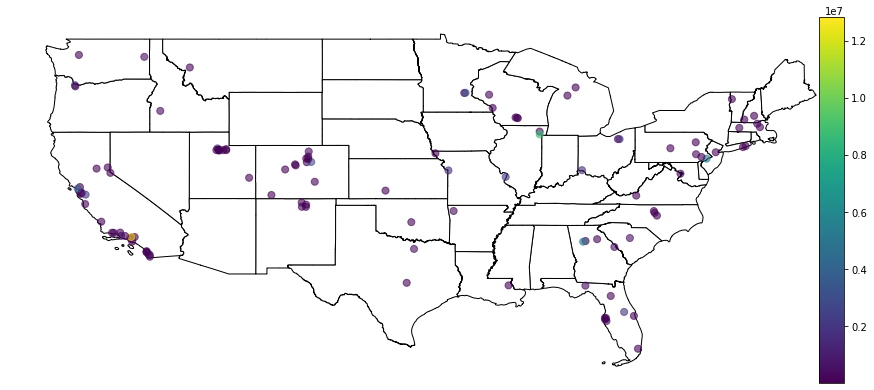

In [286]:
fig, ax = plt.subplots(figsize=(15,15)) 

#countries.plot(ax=ax, color='white', edgecolor='black')
test.plot(ax=ax, color='white', edgecolor='black')
#to_crs(crs = {'init': 'epsg:4326'}).
#cities_gdf.plot(ax=ax)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-0.5)

re_cities.plot(ax=ax, column='population', markersize = 50, legend=True, cax=cax, alpha = 0.6) #, markersize = re_cities['population']/1000, alpha = 0.7)#, legend = True)
#cities_100.plot(ax=ax) #, color = 'green', markersize = cities_100['population']/1000, alpha = 0.5)



ax.axis('off')

#for idx, row in cities_100.iterrows():
#    plt.annotate(s=cities_100['city'], xy=i['coords'], horizontalalignment='center')
#https://gis.stackexchange.com/questions/241612/change-marker-size-in-plot-with-geopandas
#cities_100.apply(lambda x: ax.annotate(s=cities_100.city, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
plt.show()